In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import random
import tensorflow as tf
from tflite_support import metadata as _metadata

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers

from sklearn.metrics import confusion_matrix
from itertools import product

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    https://deeplizard.com/learn/video/bfQBPNDy5EM
    """
    plt.figure(figsize=(7, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Prepare test dataset

In [2]:
batch_size = 32
img_height = 180
img_width = 180
image_shape = (img_height, img_width, 3)

directory = "IMAGES/test"
log_root = "logs"
model_dir = "models"
model_name = "CNN_final"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123
)

steps_per_epoch = len(test_ds)
num_classes = len(test_ds.class_names)
class_names = test_ds.class_names
print(class_names)

Found 300 files belonging to 6 classes.
['1', '10', '2', '20', '5', '50']


## Load the model

In [3]:
model_save_path = os.path.join(model_dir, model_name)

model = keras.models.load_model(model_save_path)

## Evaluate on the test dataset

Confusion matrix, without normalization


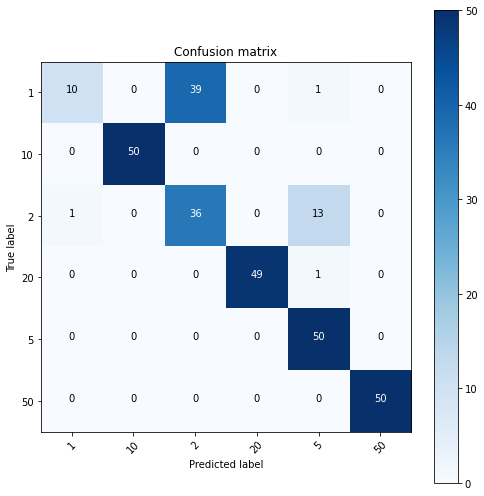

In [4]:
cm = np.zeros((len(class_names), len(class_names)), dtype=np.int)

for test_imgs, test_labels in test_ds:
    predictions = np.argmax(model.predict(test_imgs), axis=-1)
    cm += confusion_matrix(y_true=test_labels, y_pred=predictions, labels = np.arange(len(class_names)))
    
plot_confusion_matrix(cm, class_names)

## Predict on a custom image

Predicted: 2 with a 87.84% confidence.
Correct: 2


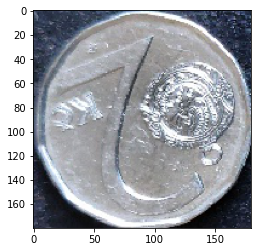

In [6]:
class_num = 2

# get image path
img_dir_path = os.path.join(directory, class_names[class_num])
img_dir = [f for f in os.listdir(img_dir_path) if os.path.isfile(os.path.join(img_dir_path, f))]
img_name = img_dir[random.randint(0, len(img_dir)-1)]
img_path = img_dir_path + "/" + img_name

# load image
img = keras.preprocessing.image.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array_batch = tf.expand_dims(img_array, 0) # Create a batch

# predict
predictions = model.predict(img_array_batch)

#print(predictions)

# show results
plt.imshow(img_array.astype("uint8"))

print(
    "Predicted: {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

print("Correct: " + str(class_names[class_num]))